In [38]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as lines

import copy

In [68]:
# rozmery prostoru
WORLD_HEIGHT = 6
WORLD_WIDTH = 6

ROW_HEIGHT = WORLD_HEIGHT / 6
COLUMN_WIDTH = WORLD_WIDTH / 6

# rozmery vykreslovaneho obrazku
FIG_HEIGHT = 15
FIG_WIDTH = 15

In [97]:
# nacteni planu
steps = []
with open("Plan.txt", "r", encoding="utf-8") as f:
    for row in f.readlines():
        steps.append(row.strip().rstrip(')').lstrip('(').split()[1:])

In [52]:
# pocatecni pozice vozu
start_vehicles = {
    'car_y':[[1,3],[2,3]],
    'car_r':[[3,1],[3,2]],
    'car_g':[[5,3],[5,4]],
    'car_b':[[4,2],[5,2]],
    
    'truck_g':[[2,4],[3,4],[4,4]],
    'truck_b':[[3,5],[4,5],[5,5]]
}

In [109]:
# barvy voziddel
colors = {
    'car_y':'#ffcc00',
    'car_r':'r',
    'car_g':'#004d00',
    'car_b':'#996633',
    
    'truck_g':'#00b300',
    'truck_b':'k'
}

In [110]:
def print_frame(vehicles):
    fig, ax = plt.subplots(figsize=(FIG_WIDTH, FIG_HEIGHT))
    ax.set_axis_off()
    
    # show border
    ax.add_patch(patches.Rectangle((0.001, 0.001), 0.99, 0.99, fill=False))
    
    # vehicles
    for vehicle in vehicles:
        for place in vehicles[vehicle]:
            ax.add_patch(patches.Rectangle((place[0] / WORLD_WIDTH, 
                                         place[1] / WORLD_HEIGHT), 1/6 - 0.02, 1/6 - 0.02, 
                                        color=colors[vehicle]))
    # target
    ax.add_patch(patches.Rectangle((1-0.02, 1-3*(1/6)), 0.02, 1/6-0.02, color='#00ffff'))

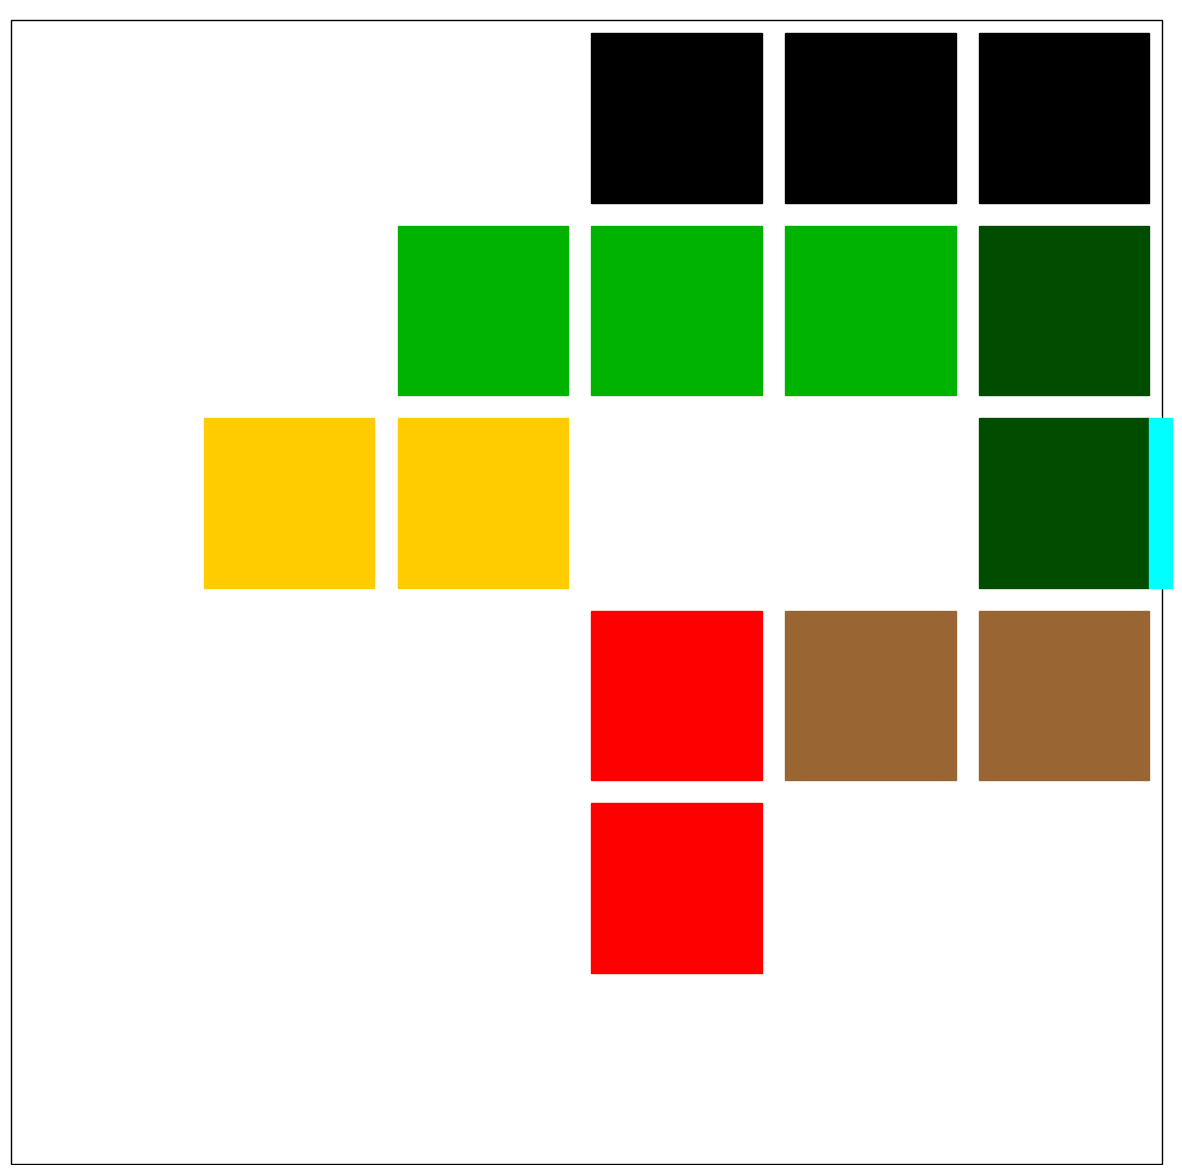

In [111]:
print_frame(start_vehicles)

In [55]:
def get_pos_car(vehicles, vehicle, new_pos_x, new_pos_y):
    new_pos = []
    
    # posun vertikalni
    if vehicles[vehicle][0][0] == vehicles[vehicle][1][0]:
        # nahoru
        if new_pos_y > vehicles[vehicle][0][1] and new_pos_y > vehicles[vehicle][1][1]:
            if vehicles[vehicle][0][1] > vehicles[vehicle][1][1]:
                new_pos.append(vehicles[vehicle][0])
                new_pos.append([new_pos_x, new_pos_y])
            else:
                new_pos.append(vehicles[vehicle][1])
                new_pos.append([new_pos_x, new_pos_y])
        # dolu    
        else:
            if vehicles[vehicle][0][1] < vehicles[vehicle][1][1]:
                new_pos.append(vehicles[vehicle][0])
                new_pos.append([new_pos_x, new_pos_y])
            else:
                new_pos.append(vehicles[vehicle][1])
                new_pos.append([new_pos_x, new_pos_y])

    # horizontalni
    elif vehicles[vehicle][0][1] == vehicles[vehicle][1][1]:
        # vpravo
        if new_pos_x > vehicles[vehicle][0][0] and new_pos_x > vehicles[vehicle][1][0]:
            if vehicles[vehicle][0][0] > vehicles[vehicle][1][0]:
                new_pos.append(vehicles[vehicle][0])
                new_pos.append([new_pos_x, new_pos_y])
            else:
                new_pos.append(vehicles[vehicle][1])
                new_pos.append([new_pos_x, new_pos_y])
        # vlevo    
        else:
            if vehicles[vehicle][0][0] < vehicles[vehicle][1][0]:
                new_pos.append(vehicles[vehicle][0])
                new_pos.append([new_pos_x, new_pos_y])
            else:
                new_pos.append(vehicles[vehicle][1])
                new_pos.append([new_pos_x, new_pos_y])
    return new_pos

In [56]:
def get_pos_truck(vehicles, vehicle, new_pos_x, new_pos_y):
    new_pos = []
    # posun vertikalni
    if vehicles[vehicle][0][0] == vehicles[vehicle][1][0] and vehicles[vehicle][0][0] == vehicles[vehicle][2][0]:
        # nahoru
        if new_pos_y > vehicles[vehicle][0][1] and new_pos_y > vehicles[vehicle][1][1] and new_pos_y > vehicles[vehicle][2][1]:

            if vehicles[vehicle][0][1] < vehicles[vehicle][1][1] and vehicles[vehicle][0][1] < vehicles[vehicle][2][1]:
                new_pos.append(vehicles[vehicle][1])
                new_pos.append(vehicles[vehicle][2])
                new_pos.append([new_pos_x, new_pos_y])

            elif vehicles[vehicle][1][1] < vehicles[vehicle][0][1] and vehicles[vehicle][1][1] < vehicles[vehicle][2][1]:
                new_pos.append(vehicles[vehicle][0])
                new_pos.append(vehicles[vehicle][2])
                new_pos.append([new_pos_x, new_pos_y])

            else:
                new_pos.append(vehicles[vehicle][0])
                new_pos.append(vehicles[vehicle][1])
                new_pos.append([new_pos_x, new_pos_y])
        # dolu    
        else:
            if vehicles[vehicle][0][1] > vehicles[vehicle][1][1] and vehicles[vehicle][0][1] > vehicles[vehicle][2][1]:
                new_pos.append(vehicles[vehicle][1])
                new_pos.append(vehicles[vehicle][2])
                new_pos.append([new_pos_x, new_pos_y])

            elif vehicles[vehicle][1][1] > vehicles[vehicle][0][1] and vehicles[vehicle][1][1] > vehicles[vehicle][2][1]:
                new_pos.append(vehicles[vehicle][0])
                new_pos.append(vehicles[vehicle][2])
                new_pos.append([new_pos_x, new_pos_y])

            else:
                new_pos.append(vehicles[vehicle][0])
                new_pos.append(vehicles[vehicle][1])
                new_pos.append([new_pos_x, new_pos_y])

    # horizontalni
    elif vehicles[vehicle][0][1] == vehicles[vehicle][1][1] and vehicles[vehicle][2][0] == vehicles[vehicle][2][1]:
        # vpravo
        if new_pos_y > vehicles[vehicle][0][0] and new_pos_y > vehicles[vehicle][1][0] and new_pos_y > vehicles[vehicle][2][0]:

            if vehicles[vehicle][0][0] < vehicles[vehicle][1][0] and vehicles[vehicle][0][0] < vehicles[vehicle][2][0]:
                new_pos.append(vehicles[vehicle][1])
                new_pos.append(vehicles[vehicle][2])
                new_pos.append([new_pos_x, new_pos_y])

            elif vehicles[vehicle][1][0] < vehicles[vehicle][0][0] and vehicles[vehicle][1][0] < vehicles[vehicle][2][0]:
                new_pos.append(vehicles[vehicle][0])
                new_pos.append(vehicles[vehicle][2])
                new_pos.append([new_pos_x, new_pos_y])

            else:
                new_pos.append(vehicles[vehicle][0])
                new_pos.append(vehicles[vehicle][1])
                new_pos.append([new_pos_x, new_pos_y])
        # vlevo    
        else:
            if vehicles[vehicle][0][0] > vehicles[vehicle][1][0] and vehicles[vehicle][0][0] > vehicles[vehicle][2][0]:
                new_pos.append(vehicles[vehicle][1])
                new_pos.append(vehicles[vehicle][2])
                new_pos.append([new_pos_x, new_pos_y])

            elif vehicles[vehicle][1][0] > vehicles[vehicle][0][0] and vehicles[vehicle][1][0] > vehicles[vehicle][2][0]:
                new_pos.append(vehicles[vehicle][0])
                new_pos.append(vehicles[vehicle][2])
                new_pos.append([new_pos_x, new_pos_y])

            else:
                new_pos.append(vehicles[vehicle][0])
                new_pos.append(vehicles[vehicle][1])
                new_pos.append([new_pos_x, new_pos_y])
    

In [57]:
def get_new_pos(vehicles, step):
    vehicle = step[0]
    new_pos_x = int(step[-1][-2])
    new_pos_y = int(step[-1][-1])
    new_pos = []
    # car
    if len(vehicles[vehicle]) == 2:
        new_pos = get_pos_car(vehicles, vehicle, new_pos_x, new_pos_y)

    # truck
    elif len(vehicles[vehicle]) == 3:
        new_pos = get_pos_truck(vehicles, vehicle, new_pos_x, new_pos_y)
        
    return new_pos

In [113]:
def make_frames():
    vehicles = copy.deepcopy(start_vehicles)
    print_frame(vehicles)
    #frames = []
    #frames.append(vehicles)
    
    for step in steps:
        vehicle = step[0]
        vehicles[vehicle] = get_new_pos(vehicles, step)
        
        #print(vehicles[vehicle])
        print_frame(vehicles)
        #frames.append(print_frame(vehicles))
    #return frames

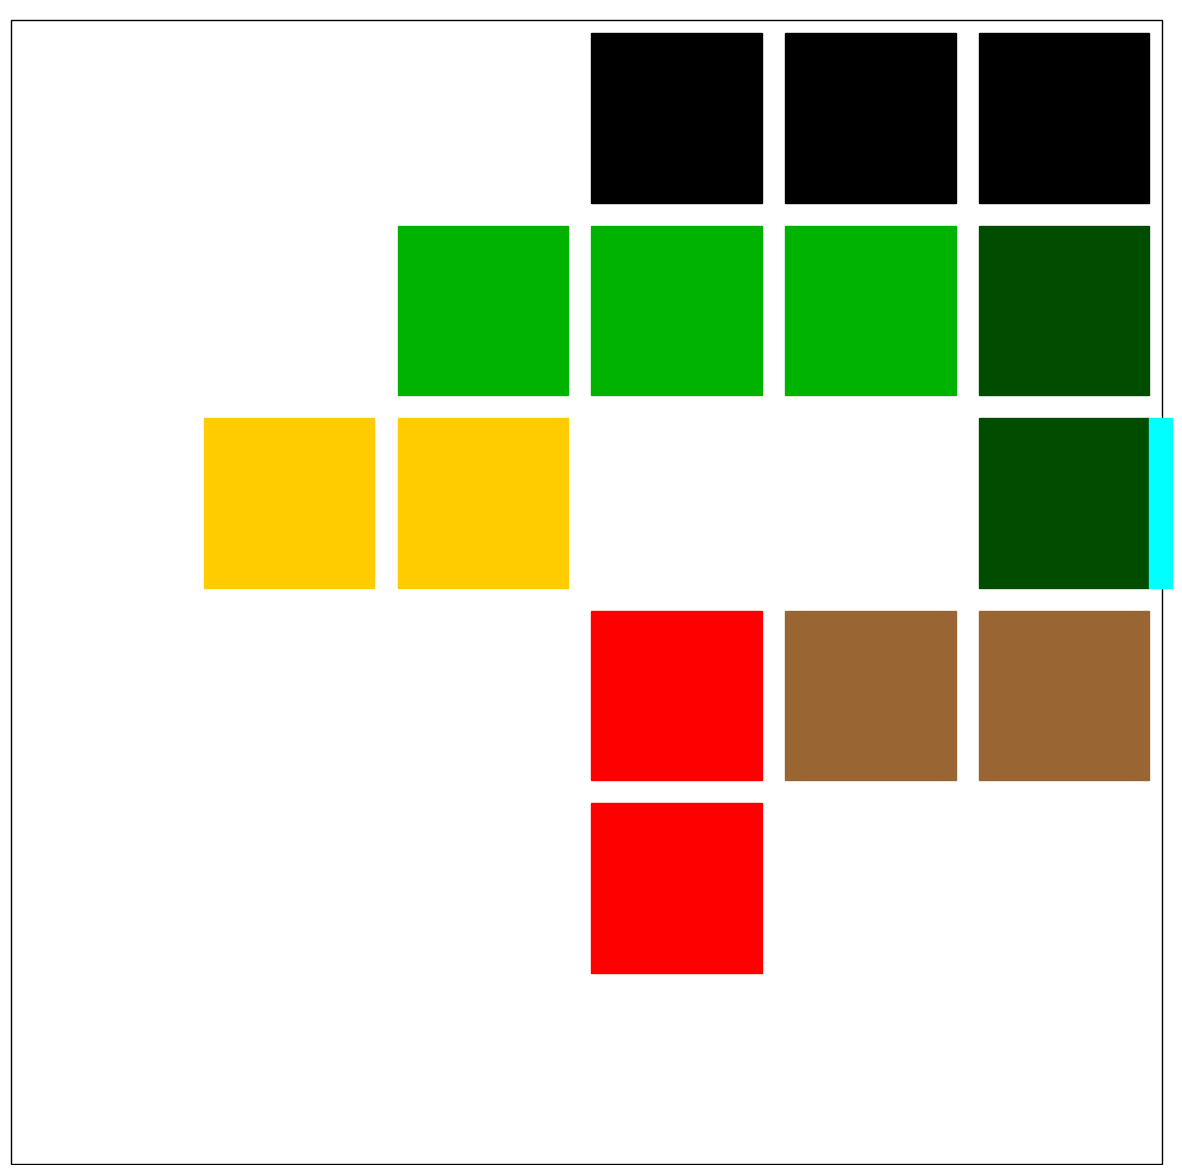

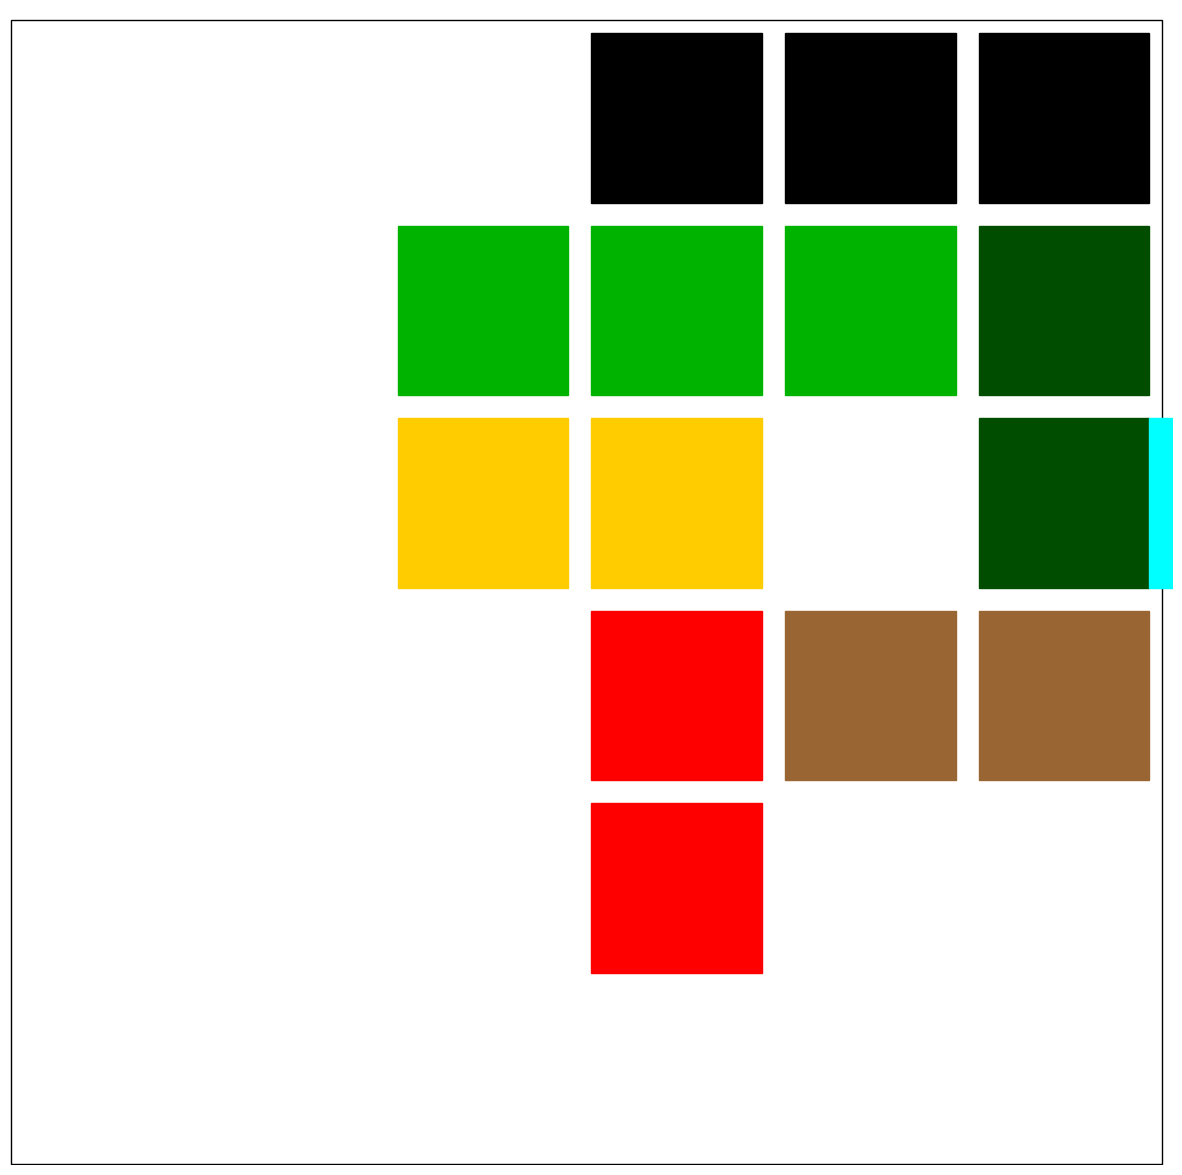

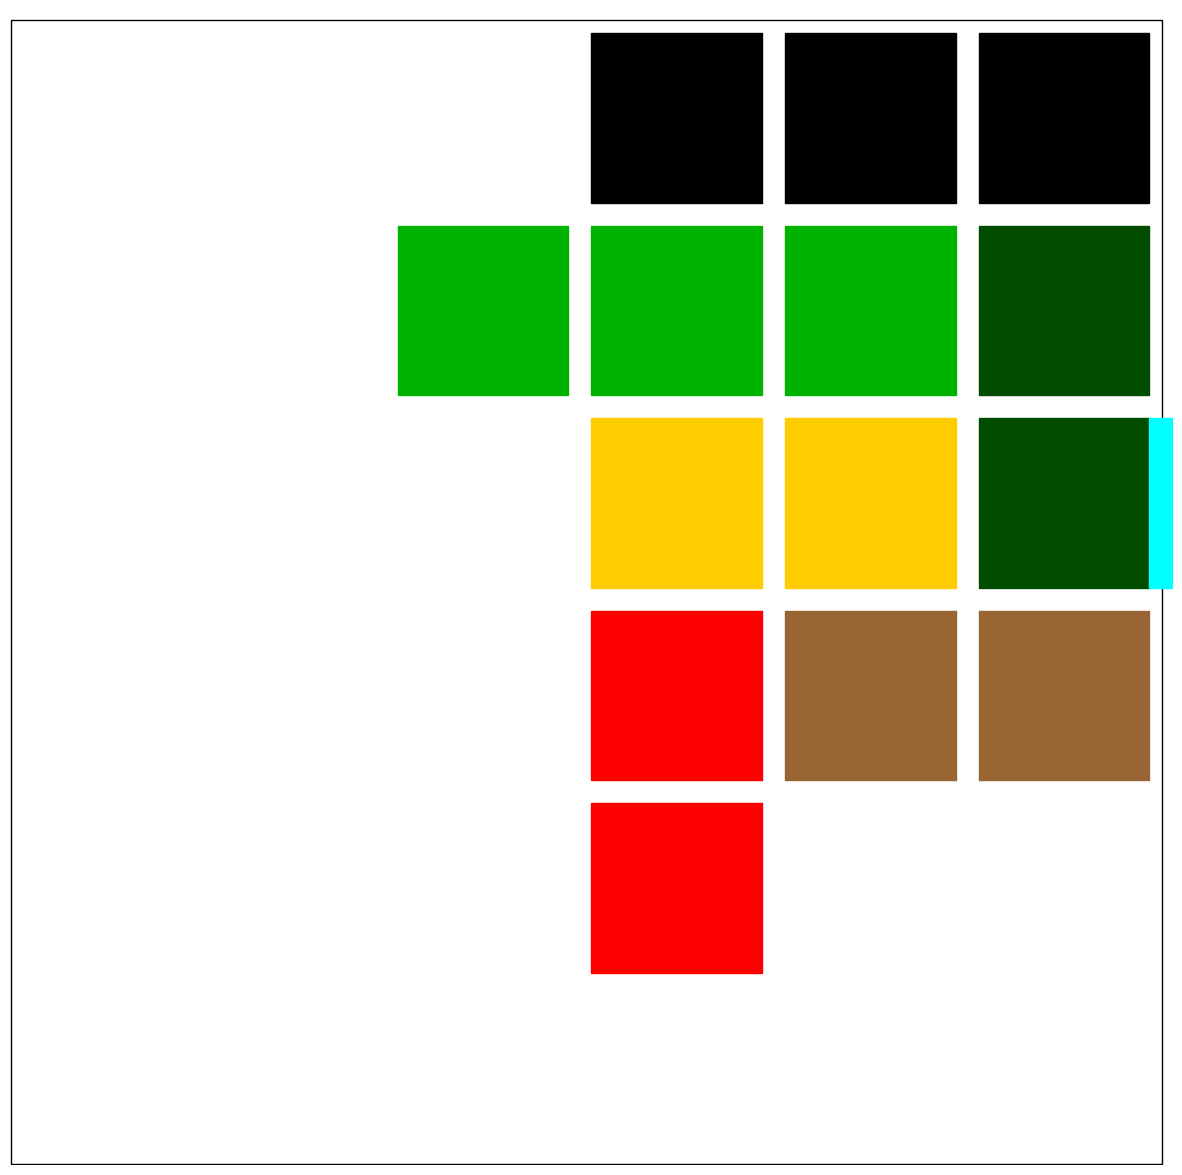

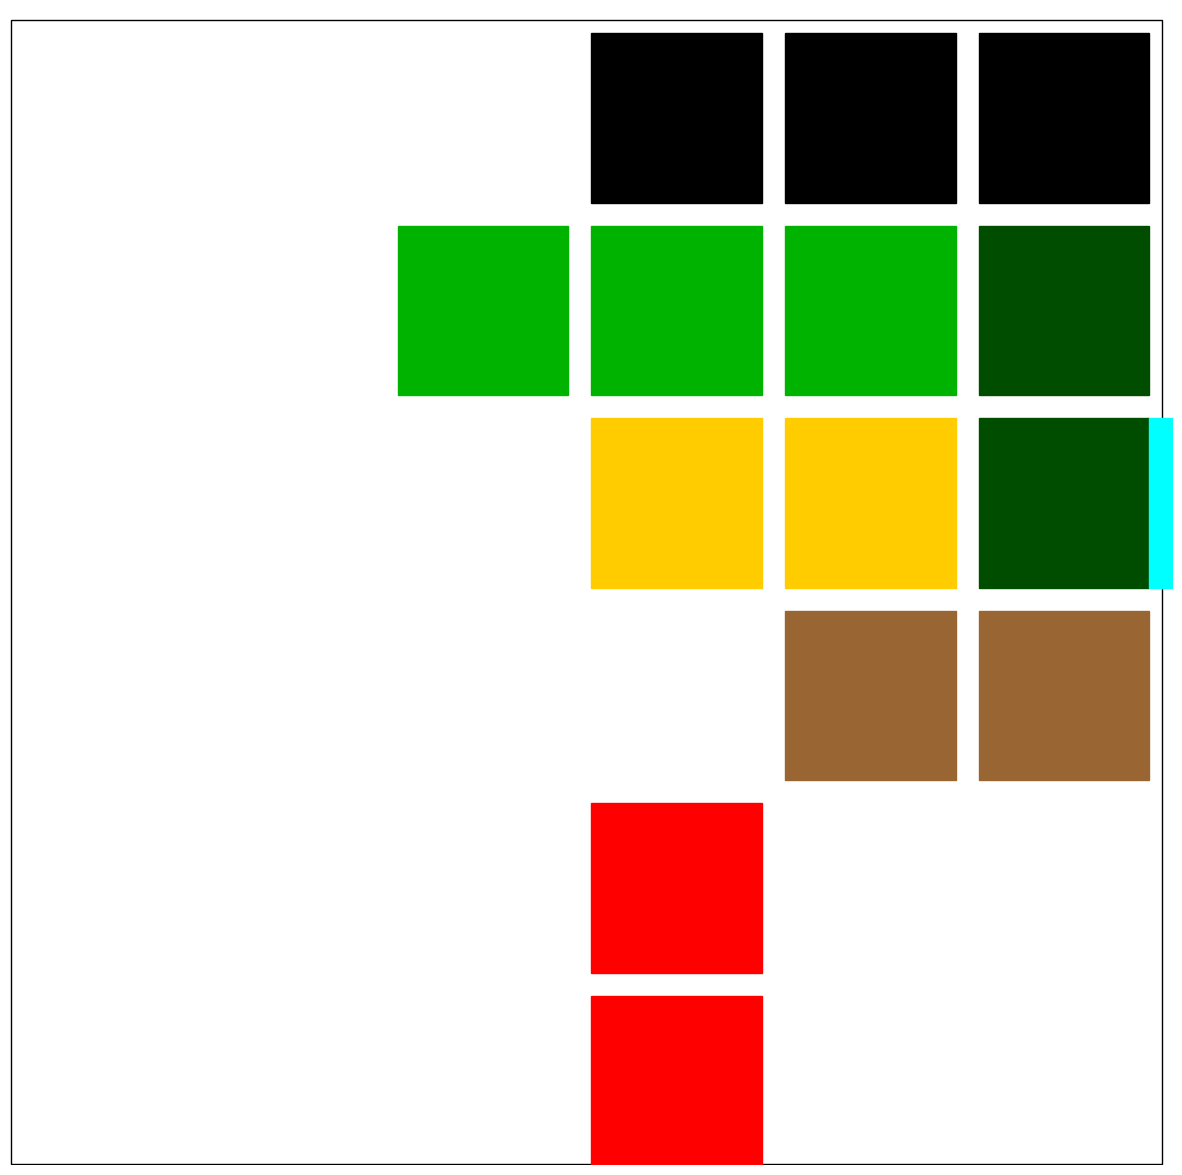

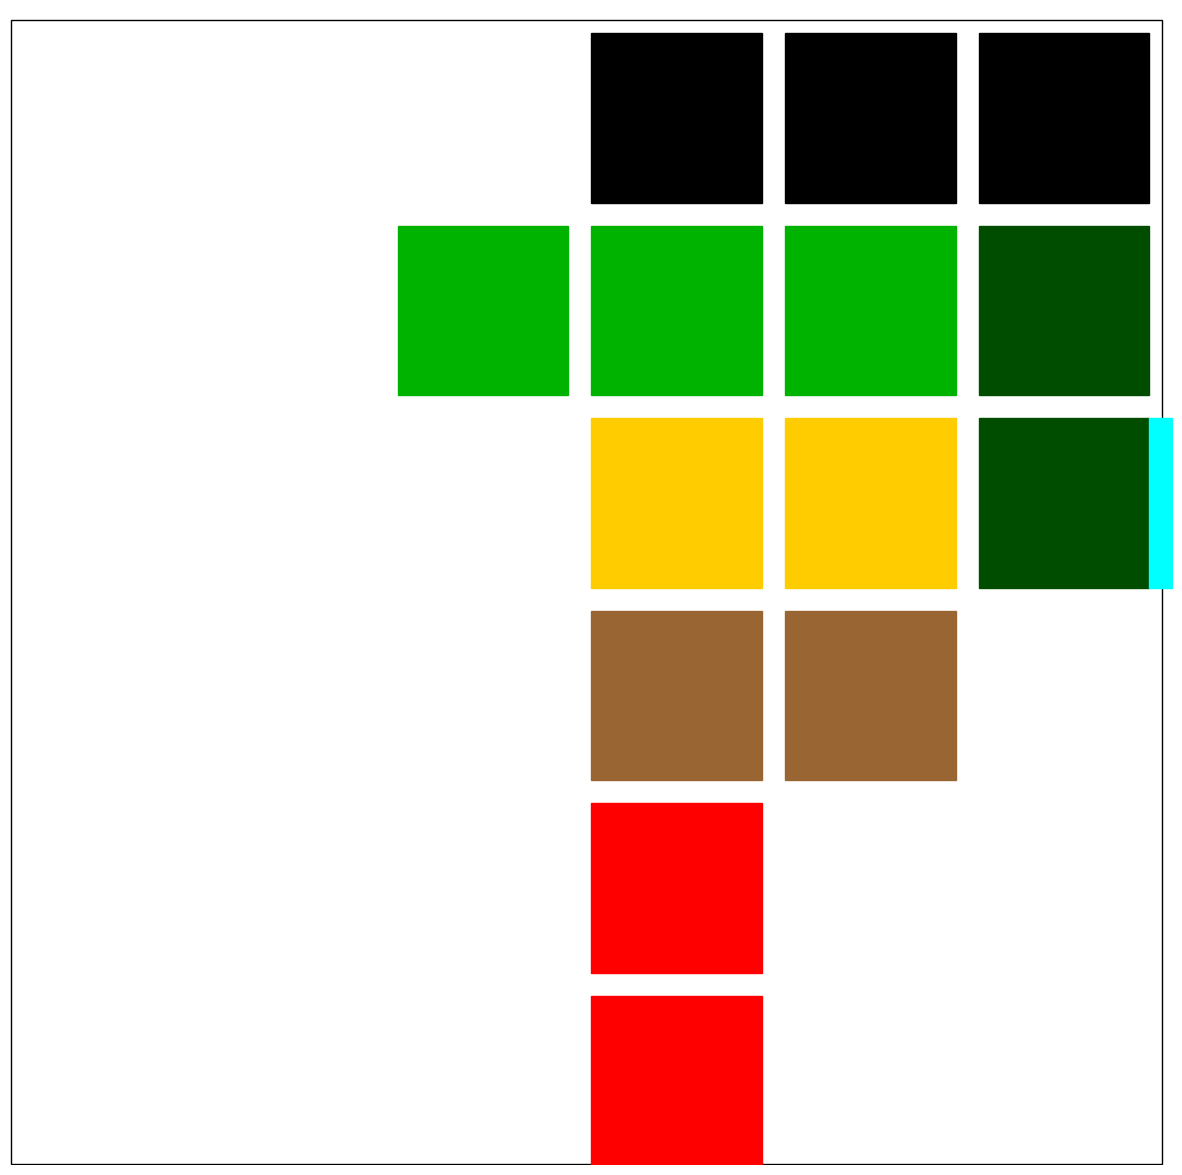

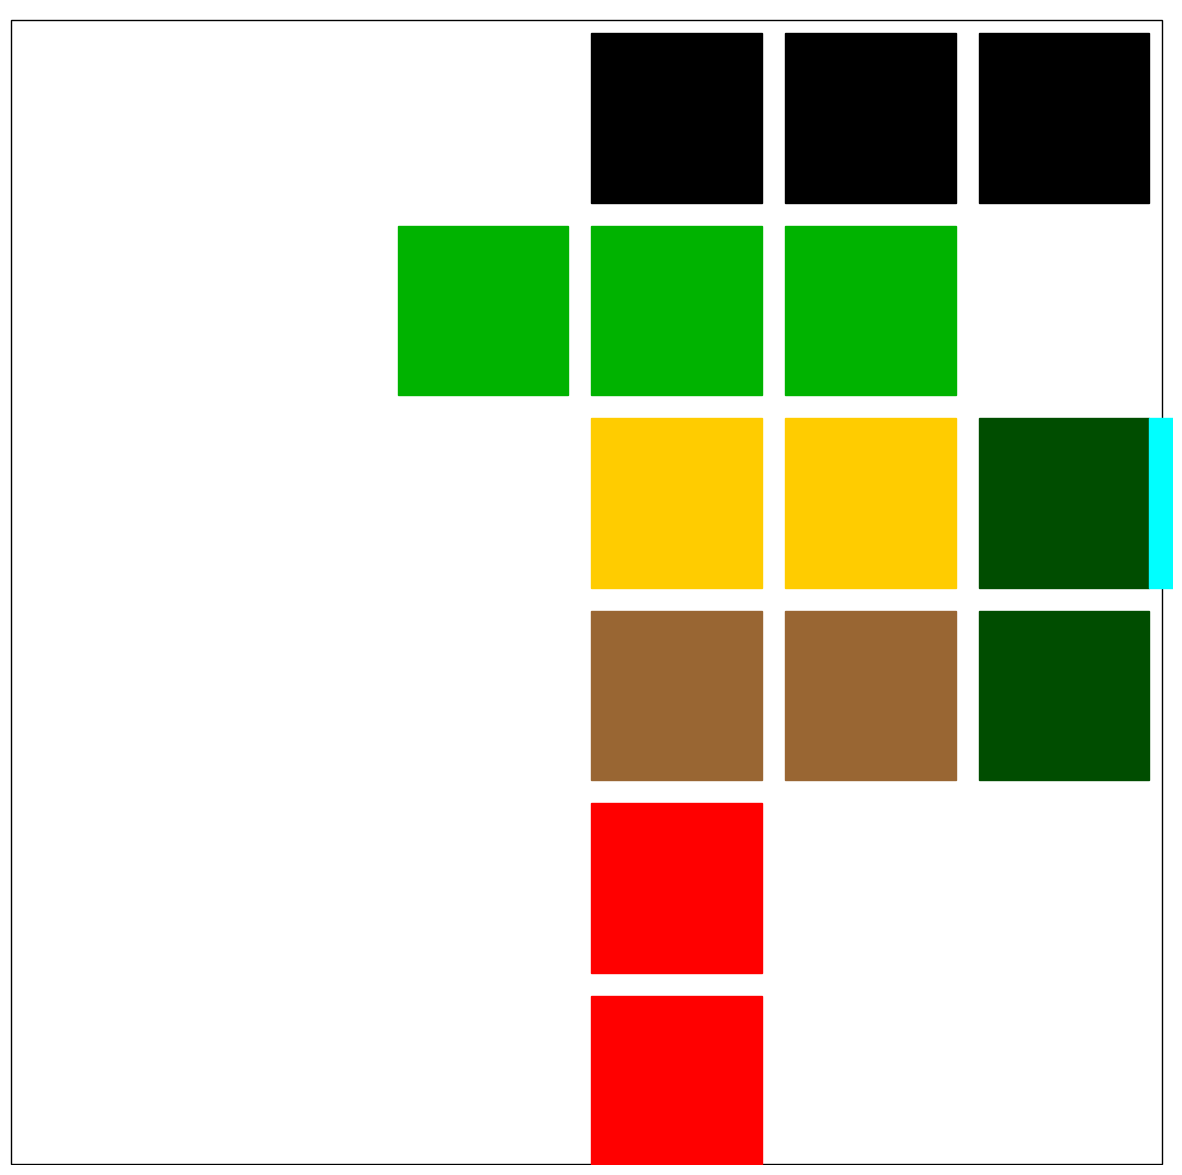

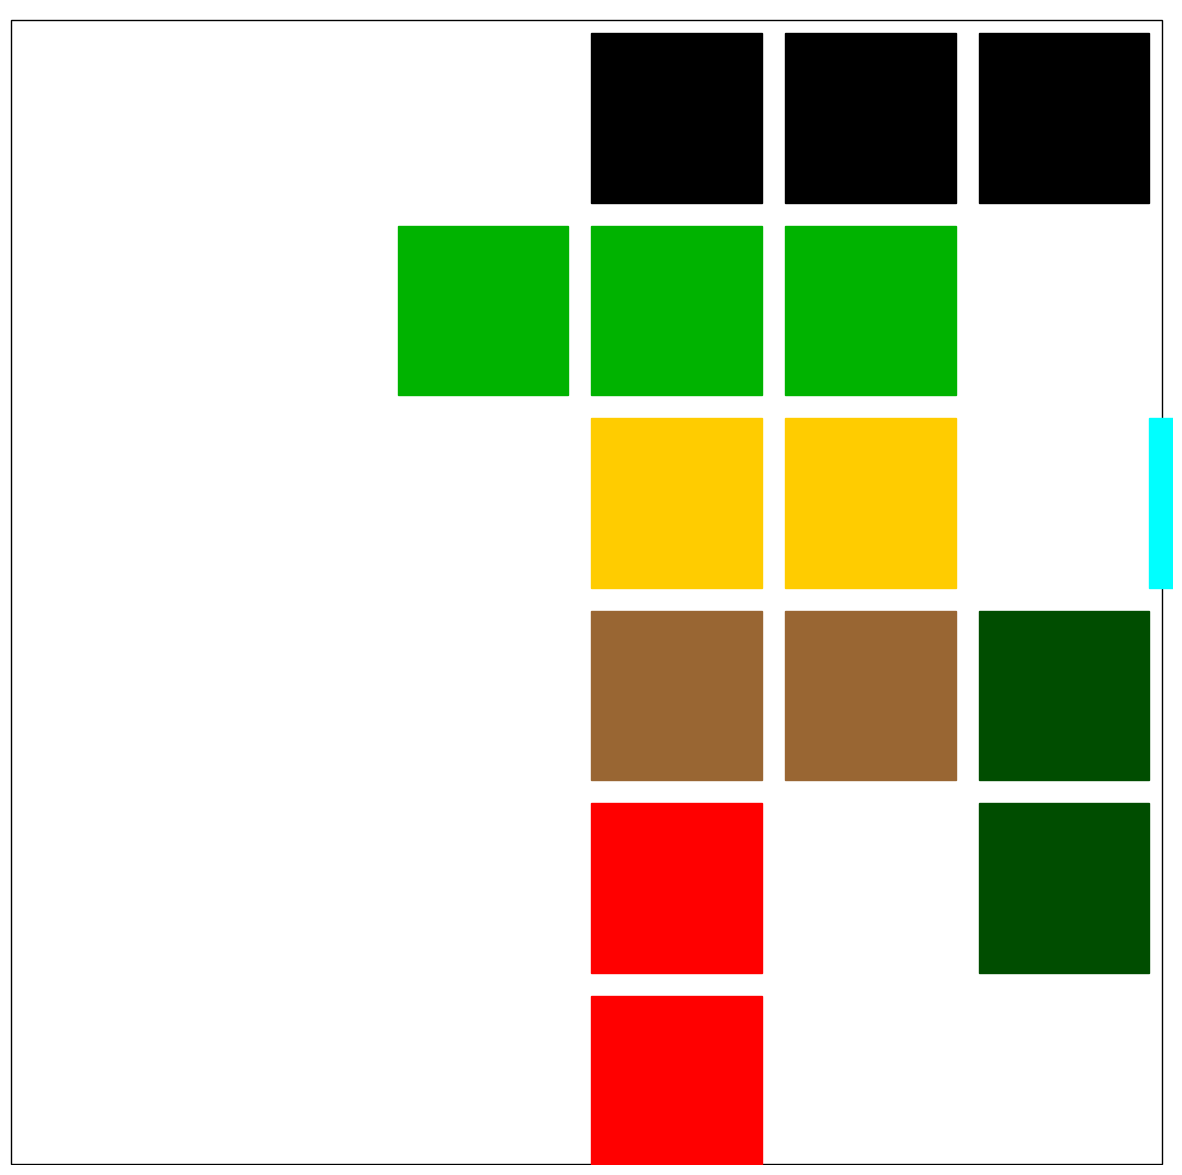

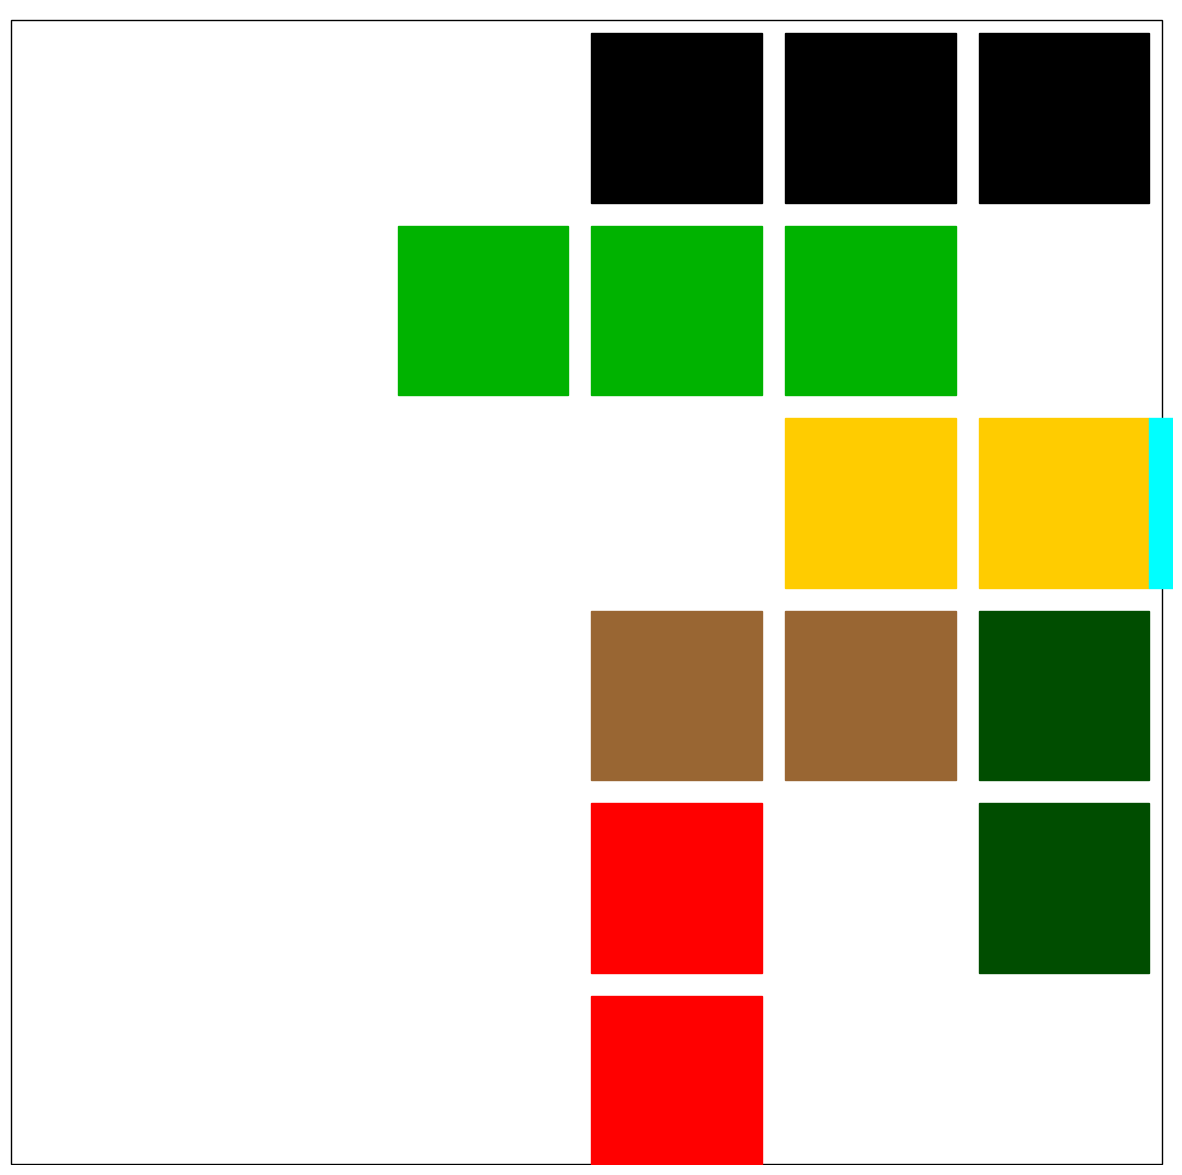

In [114]:
make_frames()

In [50]:
make_frames()

[[2, 3], [3, 3]]
[[3, 3], [4, 3]]
[[3, 1], [3, 0]]
[[4, 2], [3, 2]]
[[5, 3], [5, 2]]
[[5, 2], [5, 1]]
[[4, 3], [5, 3]]


In [51]:
with open("Plan.txt", "r", encoding="utf-8") as f:
    for row in f.readlines():
        print(row)

(move_car_horizontal car_y place_13 place_23 place_33)

(move_car_horizontal car_y place_23 place_33 place_43)

(move_car_vertical car_r place_31 place_32 place_30)

(move_car_horizontal car_b place_52 place_42 place_32)

(move_car_vertical car_g place_53 place_54 place_52)

(move_car_vertical car_g place_52 place_53 place_51)

(move_car_horizontal car_y place_33 place_43 place_53)



In [48]:
vehicles

{'car_y': [[1, 3], [2, 3]],
 'car_r': [[3, 1], [3, 2]],
 'car_g': [[5, 3], [5, 4]],
 'car_b': [[4, 2], [5, 2]],
 'truck_g': [[2, 4], [3, 4], [4, 4]],
 'truck_b': [[3, 5], [4, 5], [5, 5]]}